# Adding text and annotations to our charts

Make sure to first do the basic charts notebook before completing this notebook. This notebook relies on at least one chart you created in the previous lesson!

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's import the dataset we were using in lesson one (basic charts with matplotlib) that had crude birth, death and child mortality rates of countries around the world.

In [ ]:
# importing dataset as a 'dataframe' (df) to analyze in python
url = "https://raw.githubusercontent.com/kwonjs/datasets-to-use/main/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202-en.csv"
df = pd.read_csv(url)

Now let's clean this dataset the same way we did in lesson one. 

In [ ]:
# split columns by dash (-)
df[['Region','Country', 'Misc']] = df['Region and country - Asia'].str.split(" - ",expand=True)

# convert columns to string: 'Region', 'Country', 'Misc'
df["Region"] = df["Region"].astype(str) 
df["Country"] = df["Country"].astype(str) 
df["Misc"] = df["Misc"].astype(str) 

# filter the main dataframe to create separate dataframes separated by 'Region'
# for this lesson, we'll just focus on asia
asia_df = df.loc[df['Country'] == 'Asia']

# switching the 'Region' and 'Country' colums
asia_df = asia_df.rename(columns={'Region': 'Country', 'Country': 'Region'})

Now we're going to recreate the scatterplot of crude birth and death rates of specific countries in Asia (aka Iran and its neighbors). 

In [ ]:
# we can rename countries with longer names to one word for easier data analysis and visualization
asia_df = asia_df.replace({'Country':{"Iran, Islamic Republic":"Iran", "Azerbaijan, Republic of": "Azerbaijan"}})

In [ ]:
# now let's filter asia_df to just get data from Iran's neighbors
iran_neighbors = asia_df[asia_df['Country'].isin(["Iran", "Azerbaijan", "Armenia", "Turkmenistan", "Pakistan", "Afghanistan", "Oman", "Turkey", "Iraq"])]
iran_neighbors # this should return a dataframe but with data on birth and death rates and child mortality rates from the countries above

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Country,Region,Misc
1,"Azerbaijan, Republic of - Asia",14,6,11.0,Azerbaijan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None
8,"Iran, Islamic Republic - Asia",17,5,6.0,Iran,Asia,None
11,Pakistan - Asia,28,6,62.0,Pakistan,Asia,None
14,Turkmenistan - Asia,23,7,43.0,Turkmenistan,Asia,None
15,Turkey - Asia,18,5,9.0,Turkey,Asia,None
20,Iraq - Asia,27,4,23.0,Iraq,Asia,None
22,Oman - Asia,21,2,9.0,Oman,Asia,None


In [ ]:
# let's get the x values for our scatter plot (birth rates)
iran_neighbors_birth = iran_neighbors['Crude birth rate - per thousand population']
iran_neighbors_birth

1     14
3     12
5     33
8     17
11    28
14    23
15    18
20    27
22    21
Name: Crude birth rate - per thousand population, dtype: int64

In [ ]:
# and then let's get the y values for our scatter plots (death rates)
iran_neighbors_death = iran_neighbors['Crude death rate - per thousand population']
iran_neighbors_death

1     6
3     9
5     6
8     5
11    6
14    7
15    5
20    4
22    2
Name: Crude death rate - per thousand population, dtype: int64

In [ ]:
iran_neighbors

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Country,Region,Misc
1,"Azerbaijan, Republic of - Asia",14,6,11.0,Azerbaijan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None
8,"Iran, Islamic Republic - Asia",17,5,6.0,Iran,Asia,None
11,Pakistan - Asia,28,6,62.0,Pakistan,Asia,None
14,Turkmenistan - Asia,23,7,43.0,Turkmenistan,Asia,None
15,Turkey - Asia,18,5,9.0,Turkey,Asia,None
20,Iraq - Asia,27,4,23.0,Iraq,Asia,None
22,Oman - Asia,21,2,9.0,Oman,Asia,None


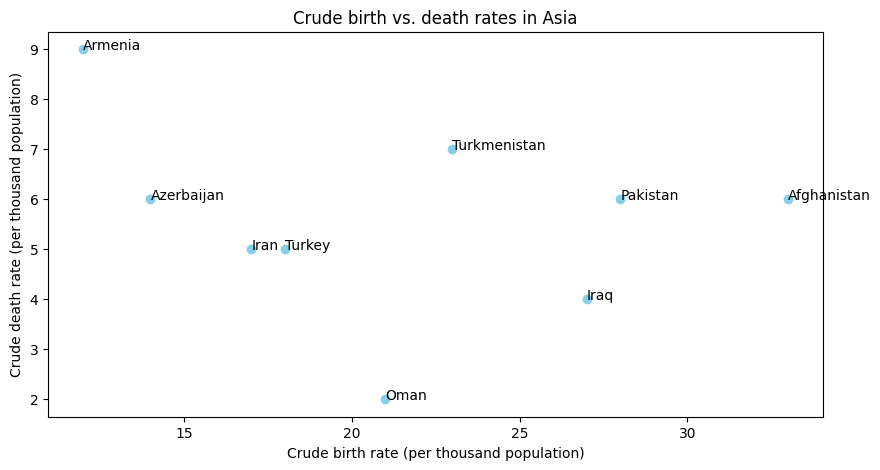

In [ ]:
# we need to make a 'subplot,' the 'ax' variable, in order to add data point labels
fig, ax = plt.subplots(figsize=(10,5))

# passing this data to the scatter plot
plt.scatter(iran_neighbors_birth, iran_neighbors_death, color='skyblue')
 
# setting the chart title, along with the x and y-axis labels
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")

# now it's time to add labels to the points

# then what the label should contain (in this case, 'Country')
# and lastly the font size
for i in range(len(iran_neighbors_birth)): # we're looping through EACH country in our dataset we're visualizing - in this case, JUST data from Iran and its neighbors
  plt.text(iran_neighbors_birth.reset_index(drop=True)[i], # and for each country, we're plotting its datapoint so we need the 'x' value (country birth rate)
           iran_neighbors_death.reset_index(drop=True)[i], # and the country's 'y' value (country death rate)
           iran_neighbors["Country"].reset_index(drop=True)[i], # and then the label corresponding to that country (the country name - contained in "Country")
           size=10) # and lastly the font size of the label

plt.show()

Now we have country labels corresponding to their dot on the scatterplot comparing crude birth and death rates, and we can visually see how Iran compares relative to its neighbors.

### Additional resources

* Annotating [matplotlib charts](https://www.python-graph-gallery.com/193-annotate-matplotlib-chart) - adding shapes and arrows
* Annotating charts [with text](https://python-charts.com/matplotlib/texts/)